# 고객세분화 (Mall)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  15180      0 --:--:-- --:--:-- --:--:-- 15180


In [0]:
!head -10 customer.csv

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [0]:
df = pd.read_csv('customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
# 3, 4 컬럼만 사용하여 배열을 만든다
X = df.iloc[:, [3, 4]].values

In [0]:


# 성별을 One Hot Encoding 
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])
from sklearn.cluster import KMeans

In [0]:
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [0]:
X[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

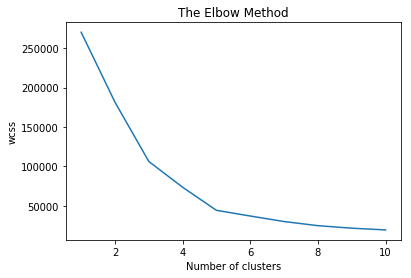

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

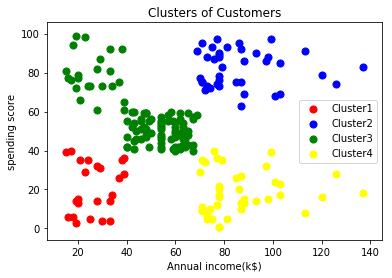

In [0]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'yellow', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [0]:
y_kmeans

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [0]:
df["cluster"] = y_kmeans
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,0
1,2,21,15,81,0,1,2
2,3,20,16,6,1,0,0
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,0
5,6,22,17,76,1,0,2
6,7,35,18,6,1,0,0
7,8,23,18,94,1,0,2
8,9,64,19,3,0,1,0
9,10,30,19,72,1,0,2
